In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('churn.csv')
df.drop(['id','Surname'], axis=1, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47011 entries, 0 to 47010
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       47011 non-null  int64  
 1   credit_score      47011 non-null  int64  
 2   country           47011 non-null  object 
 3   gender            47011 non-null  object 
 4   age               47011 non-null  float64
 5   tenure            47011 non-null  int64  
 6   balance           47011 non-null  float64
 7   product_number    47011 non-null  int64  
 8   credit_card       47011 non-null  float64
 9   active_member     47011 non-null  float64
 10  estimated_salary  47011 non-null  float64
 11  churn             47011 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.3+ MB


In [ ]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary,churn
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47006,15692761,565,Germany,Female,41.0,2,89558.39,4,1.0,1.0,4441.54,1.0
47007,15612187,776,Spain,Male,45.0,3,0.00,4,0.0,1.0,25951.91,1.0
47008,15691703,557,Spain,Female,27.0,10,0.00,1,1.0,0.0,48242.38,1.0
47009,15715297,795,France,Female,44.0,5,0.00,2,0.0,0.0,86414.41,1.0


### 범주형 변수 개요

<ipython-input-138-e774a5eafa68>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='country', data=df, palette='Set2', order=countries_ordered)
<ipython-input-138-e774a5eafa68>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'gender', palette='Set1', data = df)
<ipython-input-138-e774a5eafa68>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'tenure', palette='Set2', data = df)
<ipython-input-138-e774a5eafa68>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign 

<Axes: xlabel='churn', ylabel='count'>

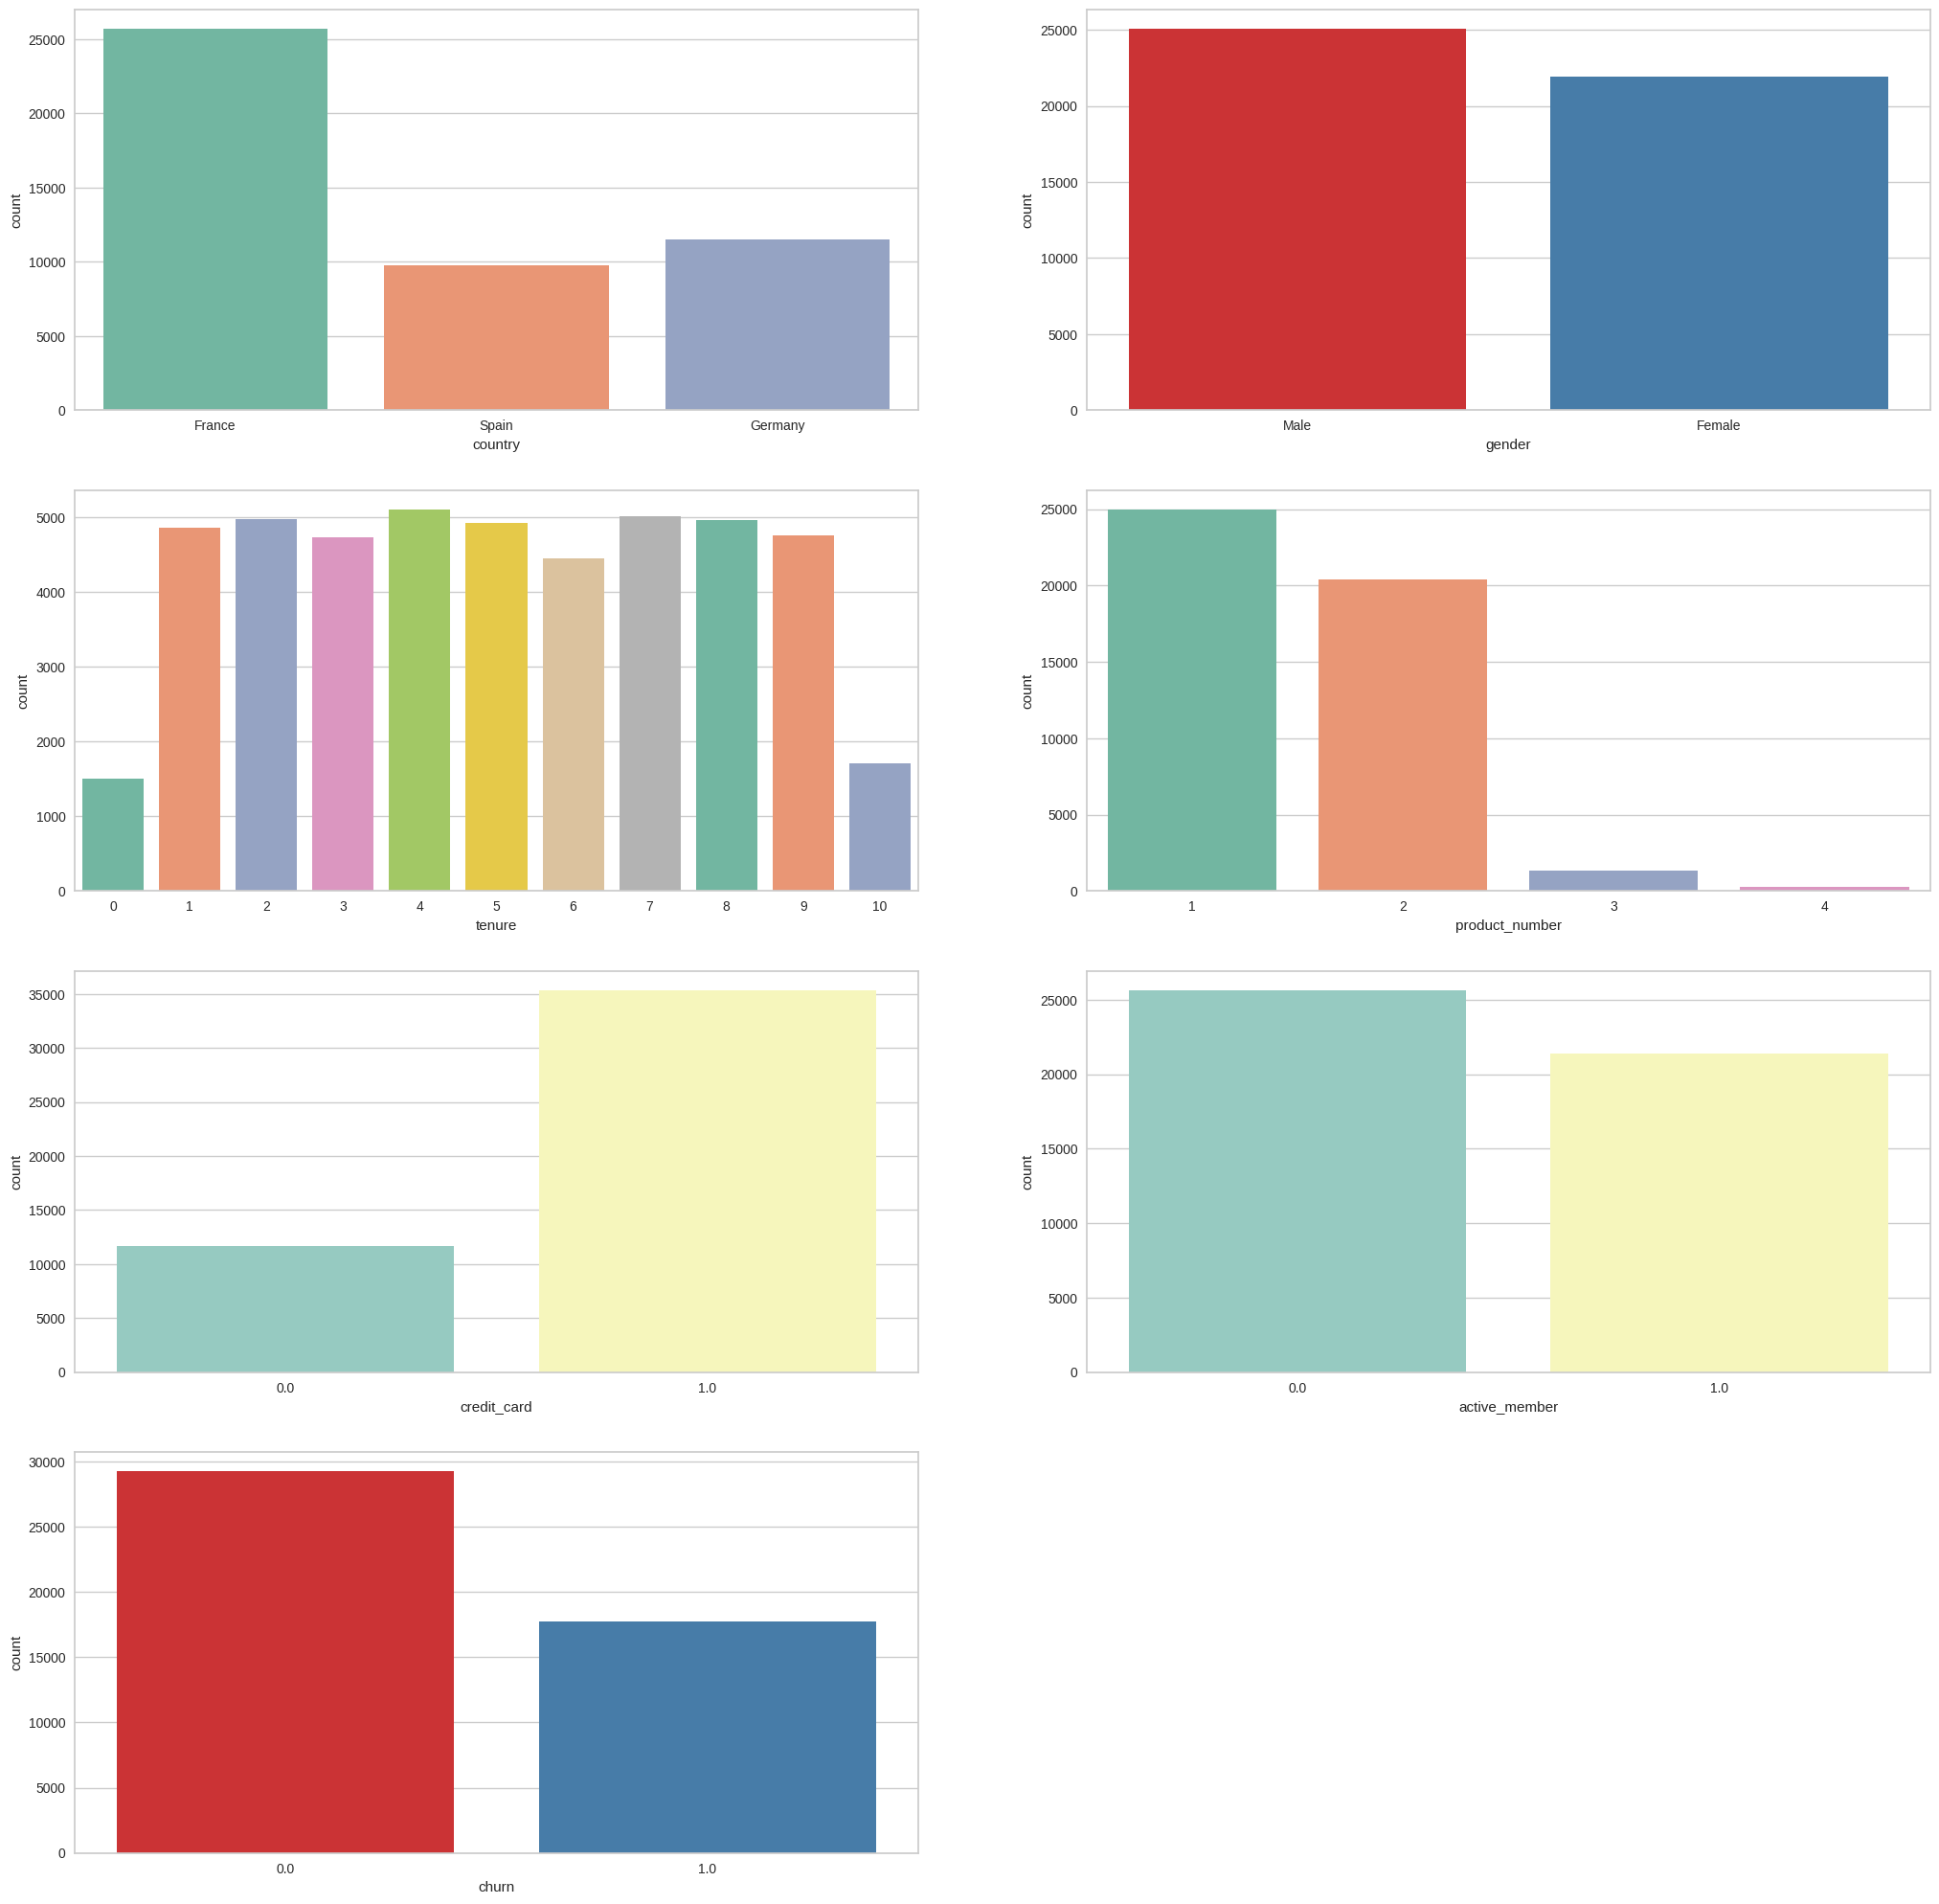

In [ ]:
plt.figure(figsize = (25,25))

plt.subplot(4,2,1)
countries_ordered = ['France','Spain', 'Germany']
sns.countplot(x='country', data=df, palette='Set2', order=countries_ordered)

plt.subplot(4,2,2)
sns.countplot(x = 'gender', palette='Set1', data = df)

plt.subplot(4,2,3)
sns.countplot(x = 'tenure', palette='Set2', data = df)

plt.subplot(4,2,4)
sns.countplot(x = 'product_number', palette='Set2', data = df)

plt.subplot(4,2,5)
sns.countplot(x = 'credit_card', palette='Set3', data = df)

plt.subplot(4,2,6)
sns.countplot(x = 'active_member', palette='Set3', data = df)

plt.subplot(4,2,7)
sns.countplot(x = 'churn', palette='Set1', data = df)

In [ ]:
df['churn'].value_counts()

churn
0.0    29248
1.0    17763
Name: count, dtype: int64

### 이변량 분석

<Axes: xlabel='churn', ylabel='count'>

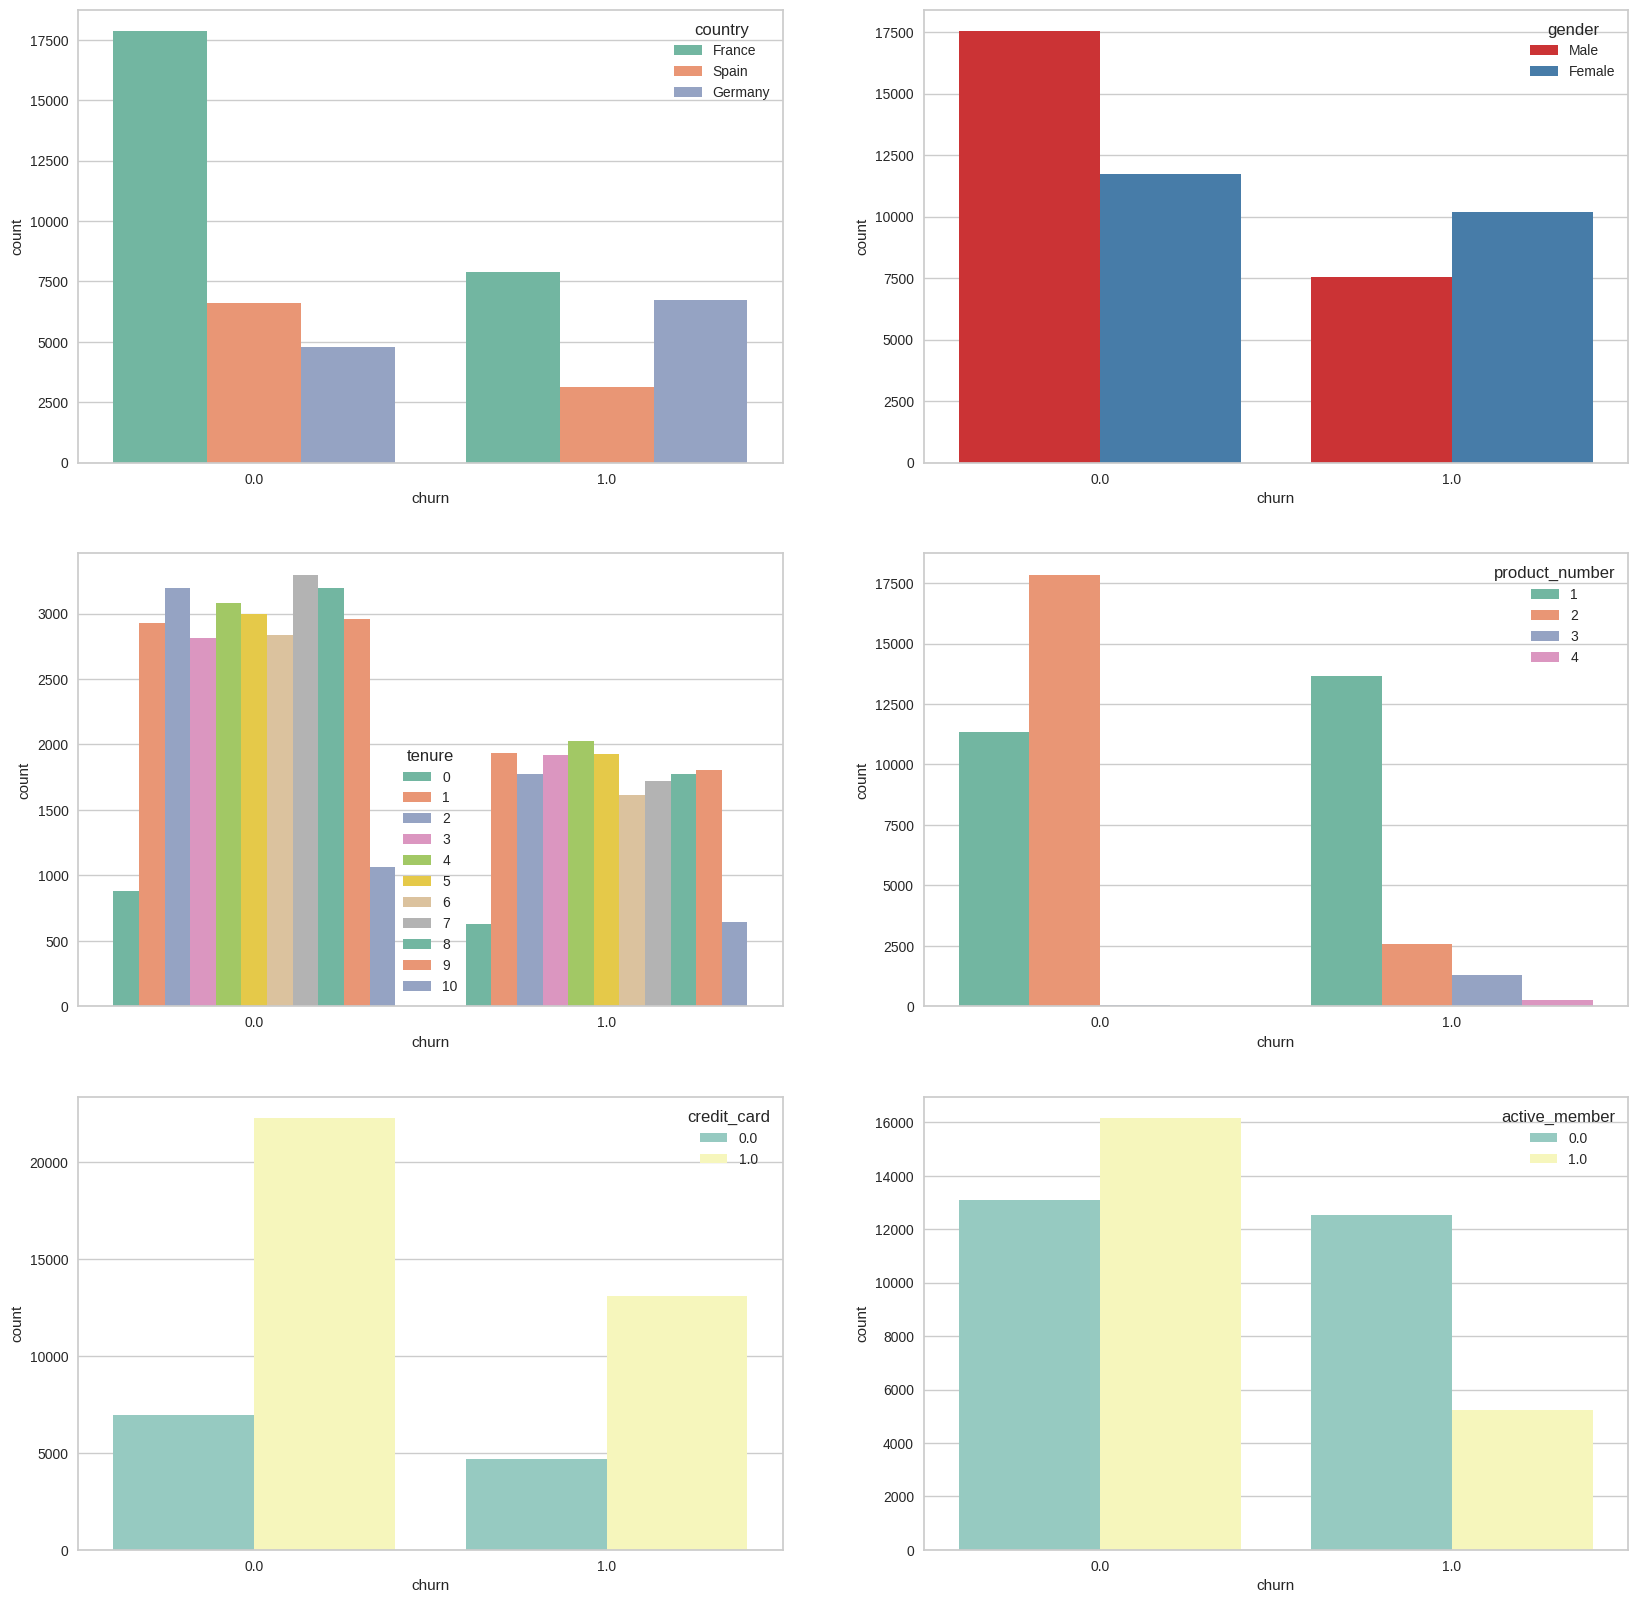

In [ ]:
plt.figure(figsize = (20,20))

plt.subplot(3,2,1)
sns.countplot(x = 'churn', hue= 'country', palette='Set2', data = df)

plt.subplot(3,2,2)
sns.countplot(x = 'churn', hue= 'gender', palette='Set1', data = df)

plt.subplot(3,2,3)
sns.countplot(x = 'churn', hue= 'tenure', palette='Set2', data = df)

plt.subplot(3,2,4)
sns.countplot(x = 'churn', hue= 'product_number', palette='Set2', data = df)

plt.subplot(3,2,5)
sns.countplot(x = 'churn', hue= 'credit_card', palette='Set3', data = df)

plt.subplot(3,2,6)
sns.countplot(x = 'churn', hue= 'active_member', palette='Set3', data = df)

### 연속형 변수 개요

<ipython-input-141-b5198277c7b1>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['credit_score'])
<ipython-input-141-b5198277c7b1>:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age'])
<ipython-input-141-b5198277c7b1>:12: UserWarning: 

`distplot` is a deprecated function and will be r

<Axes: xlabel='estimated_salary'>

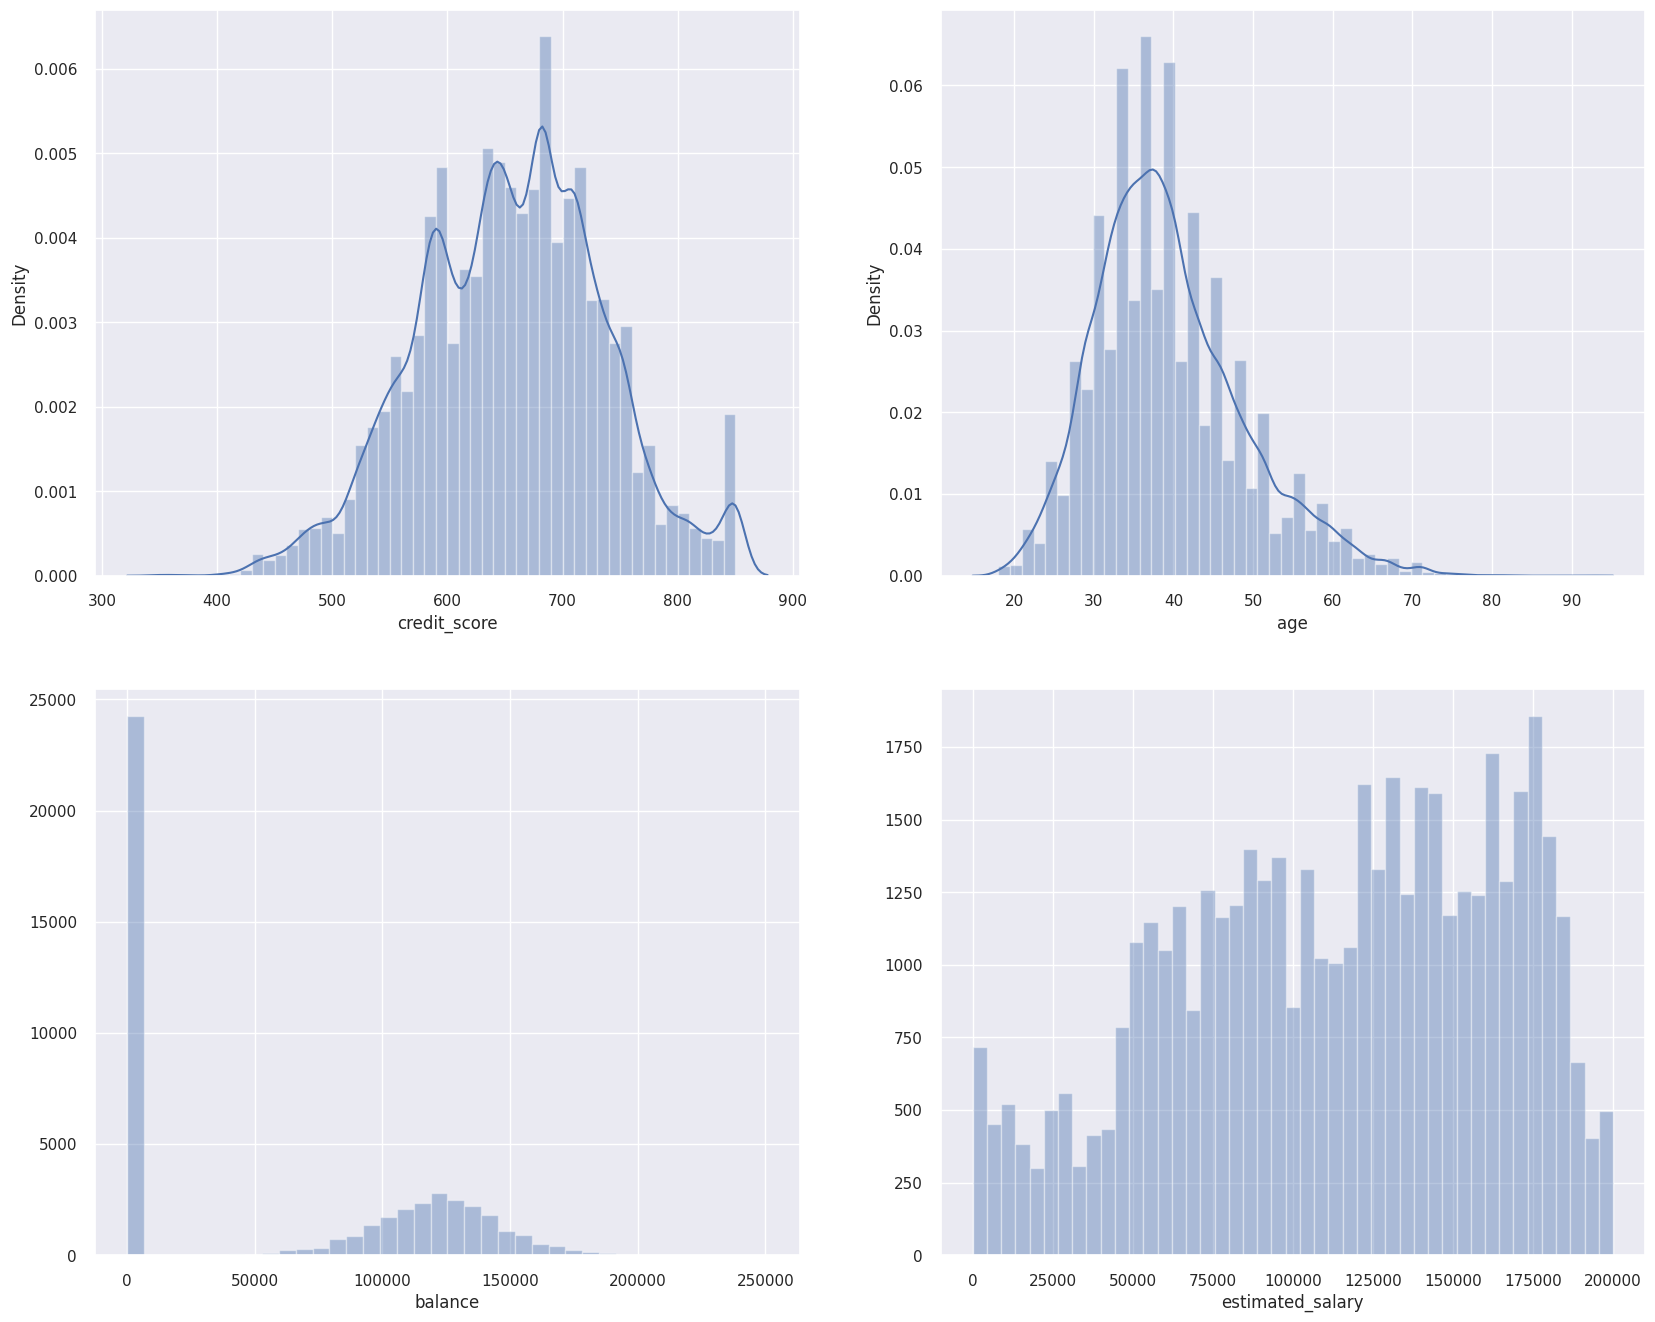

In [ ]:
plt.figure(figsize = (20,25))

sns.set(color_codes = True)

plt.subplot(3,2,1)
sns.distplot(df['credit_score'])

plt.subplot(3,2,2)
sns.distplot(df['age'])

plt.subplot(3,2,3)
sns.distplot(df['balance'], kde = False)

plt.subplot(3,2,4)
sns.distplot(df['estimated_salary'], kde = False)

In [ ]:
from scipy.stats import skew, kurtosis
categorical_vars = ['country', 'gender', 'tenure', 'products_number', 'credit_card', 'active_member', 'churn']
continuous_vars = ['credit_score', 'age', 'balance', 'estimated_salary']

stats = df[continuous_vars].describe().T
stats['skew'] = df[continuous_vars].apply(lambda x: skew(x))
stats['kurtosis'] = df[continuous_vars].apply(lambda x: kurtosis(x))

stats[['mean', 'std', 'skew', 'kurtosis']]

,mean,std,skew,kurtosis
credit_score,655.566761,80.741559,-0.048039,-0.080690
age,39.314458,9.238749,0.728240,0.647382
balance,58772.876428,63068.508628,0.276297,-1.667079
estimated_salary,113045.966357,50318.700087,-0.325239,-0.836657


### boxplot

In [ ]:
zero_balance_count = (df['balance'] == 0).sum()
zero_balance_count
zeronot_balance_count = (df['balance'] != 0).sum()
zeronot_balance_count
print(f'zero :{zero_balance_count}, non-zero: {zeronot_balance_count}')

zero :24258, non-zero: 22753


In [ ]:
df_filtered = df[df['balance'] != 0] #balance가 0이 아닌 dataset
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22753 entries, 3 to 47010
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       22753 non-null  int64  
 1   credit_score      22753 non-null  int64  
 2   country           22753 non-null  object 
 3   gender            22753 non-null  object 
 4   age               22753 non-null  float64
 5   tenure            22753 non-null  int64  
 6   balance           22753 non-null  float64
 7   product_number    22753 non-null  int64  
 8   credit_card       22753 non-null  float64
 9   active_member     22753 non-null  float64
 10  estimated_salary  22753 non-null  float64
 11  churn             22753 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 2.3+ MB


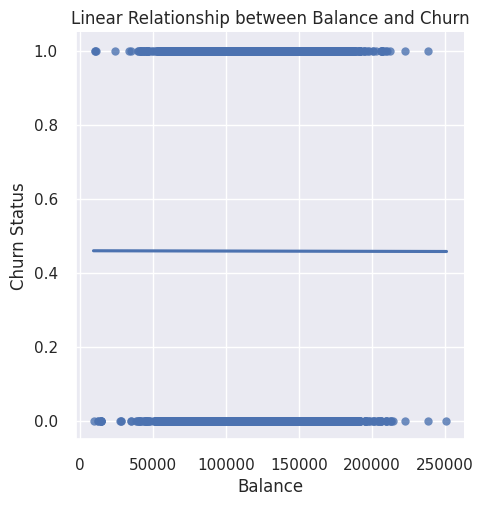

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 선형 회귀 플롯을 사용하여 'balance'와 'churn' 사이의 관계를 시각화
sns.lmplot(x='balance', y='churn', data=df_filtered, logistic=True, ci=None)
plt.title('Linear Relationship between Balance and Churn')
plt.xlabel('Balance')
plt.ylabel('Churn Status')
plt.show()


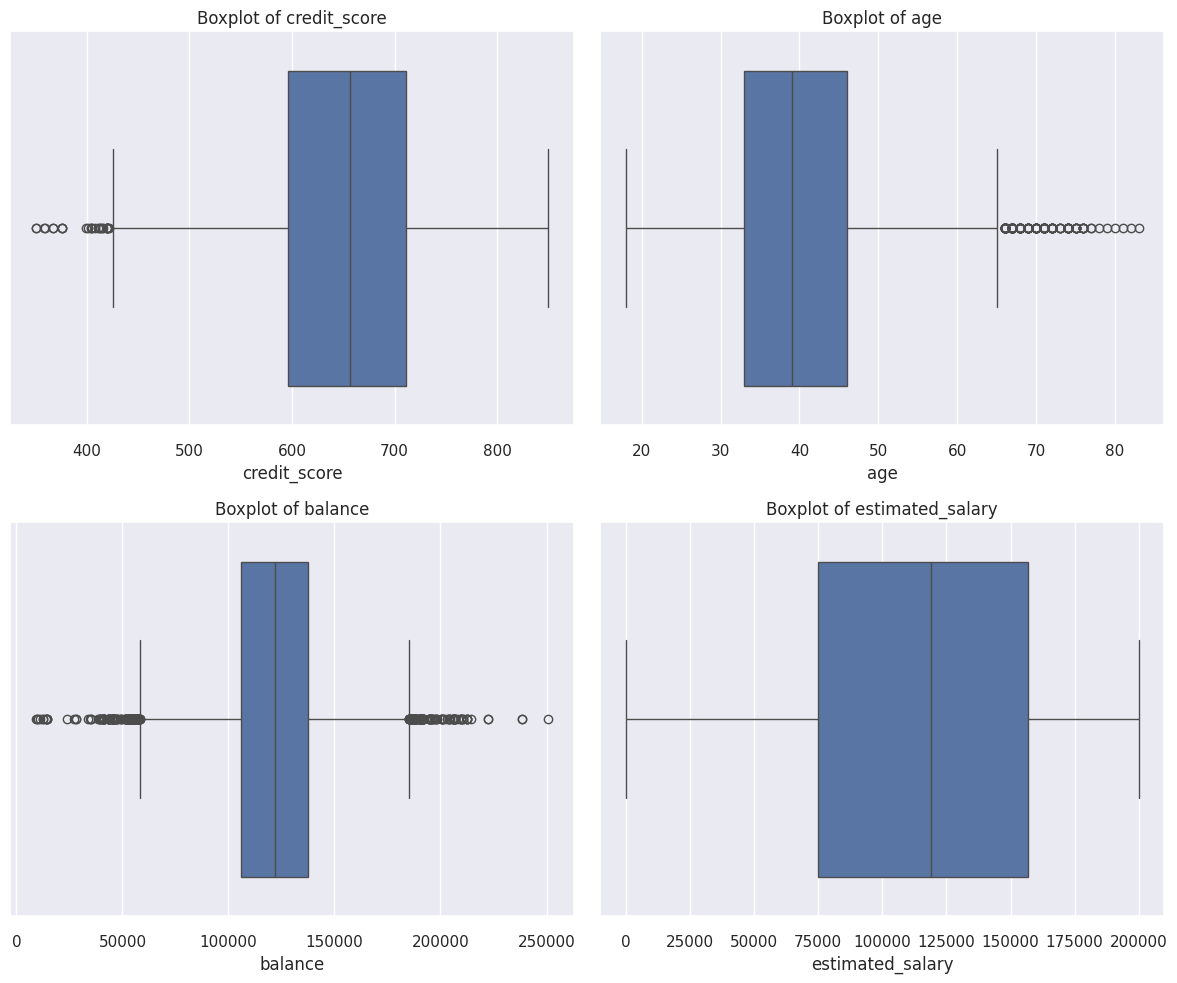

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

variables_to_plot = ['credit_score', 'age', 'balance', 'estimated_salary']

n_vars = len(variables_to_plot)
n_cols = 2
n_rows = n_vars // n_cols + (n_vars % n_cols > 0)

plt.figure(figsize=(n_cols * 6, n_rows * 5))

for i, var in enumerate(variables_to_plot, 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=var, data=df_filtered)
    plt.title(f'Boxplot of {var}')

plt.tight_layout()
plt.show()


In [ ]:
df = pd.read_csv('churn2.csv')

In [ ]:
df

,customer_id,credit_score,country,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary,churn
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0.0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0.0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0.0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0.0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47006,15692761,565,Germany,Female,41.0,2,89558.39,4,1.0,1.0,4441.54,1.0
47007,15612187,776,Spain,Male,45.0,3,0.00,4,0.0,1.0,25951.91,1.0
47008,15691703,557,Spain,Female,27.0,10,0.00,1,1.0,0.0,48242.38,1.0
47009,15715297,795,France,Female,44.0,5,0.00,2,0.0,0.0,86414.41,1.0


In [ ]:
df['balance'] = df['balance'].apply(lambda x: 1 if x != 0 else 0)
crosstab = pd.crosstab(df['balance'], df['churn'])
crosstab

churn,0.0,1.0
balance,,
0,16925,7333
1,12323,10430


### 이상치 제거

In [ ]:
from scipy import stats

# 수치형 데이터만 선택
numeric_cols = ['credit_score', 'age', 'estimated_salary']

# IQR 방법으로 이상치 제거 (수치형 열에만 적용)
df['churn'] = df['churn'].astype(int)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

filtered_df = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46252 entries, 0 to 47010
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       46252 non-null  int64  
 1   credit_score      46252 non-null  int64  
 2   country           46252 non-null  object 
 3   gender            46252 non-null  object 
 4   age               46252 non-null  float64
 5   tenure            46252 non-null  int64  
 6   balance           46252 non-null  float64
 7   product_number    46252 non-null  int64  
 8   credit_card       46252 non-null  float64
 9   active_member     46252 non-null  float64
 10  estimated_salary  46252 non-null  float64
 11  churn             46252 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 4.6+ MB


In [ ]:
num_of_ones = filtered_df['churn'].sum()
print(f"값이 1인 요소의 개수: {num_of_ones}")

값이 1인 요소의 개수: 17431


In [ ]:
from scipy import stats

# 수치형 데이터만 선택(balance는 제외)
numeric_cols = ['credit_score', 'age', 'estimated_salary']

Q1 = df[numeric_cols].quantile(0.20)
Q3 = df[numeric_cols].quantile(0.80)
IQR = Q3 - Q1

filtered_df2 = df[~((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
filtered_df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46252 entries, 0 to 47010
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       46252 non-null  int64  
 1   credit_score      46252 non-null  int64  
 2   country           46252 non-null  object 
 3   gender            46252 non-null  object 
 4   age               46252 non-null  float64
 5   tenure            46252 non-null  int64  
 6   balance           46252 non-null  float64
 7   product_number    46252 non-null  int64  
 8   credit_card       46252 non-null  float64
 9   active_member     46252 non-null  float64
 10  estimated_salary  46252 non-null  float64
 11  churn             46252 non-null  int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 4.6+ MB


In [ ]:
num_of_ones = filtered_df2['churn'].sum()
print(f"값이 1인 요소의 개수: {num_of_ones}")

값이 1인 요소의 개수: 17646


In [ ]:
encoded_columns = pd.get_dummies(df['country'], prefix='country')
df_without_country = df.drop('country', axis=1)
idx = df.columns.get_loc('country')
df_encoded = pd.concat(
    [
        df_without_country.iloc[:, :idx],
        encoded_columns,
        df_without_country.iloc[:, idx:]
    ],
    axis=1
)

df_encoded
df = df_encoded
df['gender'] = df['gender'].map({'Female': 1, 'Male': 0}) #gender column
df

,customer_id,credit_score,country_France,country_Germany,country_Spain,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary,churn
0,15674932,668,True,False,False,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,True,False,False,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,True,False,False,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,True,False,False,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,False,False,True,0,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47006,15692761,565,False,True,False,1,41.0,2,89558.39,4,1.0,1.0,4441.54,1
47007,15612187,776,False,False,True,0,45.0,3,0.00,4,0.0,1.0,25951.91,1
47008,15691703,557,False,False,True,1,27.0,10,0.00,1,1.0,0.0,48242.38,1
47009,15715297,795,True,False,False,1,44.0,5,0.00,2,0.0,0.0,86414.41,1


In [ ]:
filtered_df

,customer_id,credit_score,country_France,country_Germany,country_Spain,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary,churn
0,15674932,668,True,False,False,0,33.0,3,0,2,1.0,0.0,181449.97,0
1,15749177,627,True,False,False,0,33.0,1,0,2,1.0,1.0,49503.50,0
2,15694510,678,True,False,False,0,40.0,10,0,2,1.0,0.0,184866.69,0
3,15741417,581,True,False,False,0,34.0,2,1,1,1.0,1.0,84560.88,0
4,15766172,716,False,False,True,0,33.0,5,0,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47006,15692761,565,False,True,False,1,41.0,2,1,4,1.0,1.0,4441.54,1
47007,15612187,776,False,False,True,0,45.0,3,0,4,0.0,1.0,25951.91,1
47008,15691703,557,False,False,True,1,27.0,10,0,1,1.0,0.0,48242.38,1
47009,15715297,795,True,False,False,1,44.0,5,0,2,0.0,0.0,86414.41,1


In [ ]:
df = filtered_df2
df = df.drop('customer_id', axis=1)  # country column, drop
df_input = df.iloc[:, :-1]
df_input

,credit_score,country_France,country_Germany,country_Spain,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary
0,668,True,False,False,0,33.0,3,0,2,1.0,0.0,181449.97
1,627,True,False,False,0,33.0,1,0,2,1.0,1.0,49503.50
2,678,True,False,False,0,40.0,10,0,2,1.0,0.0,184866.69
3,581,True,False,False,0,34.0,2,1,1,1.0,1.0,84560.88
4,716,False,False,True,0,33.0,5,0,2,1.0,1.0,15068.83
...,...,...,...,...,...,...,...,...,...,...,...,...
47006,565,False,True,False,1,41.0,2,1,4,1.0,1.0,4441.54
47007,776,False,False,True,0,45.0,3,0,4,0.0,1.0,25951.91
47008,557,False,False,True,1,27.0,10,0,1,1.0,0.0,48242.38
47009,795,True,False,False,1,44.0,5,0,2,0.0,0.0,86414.41


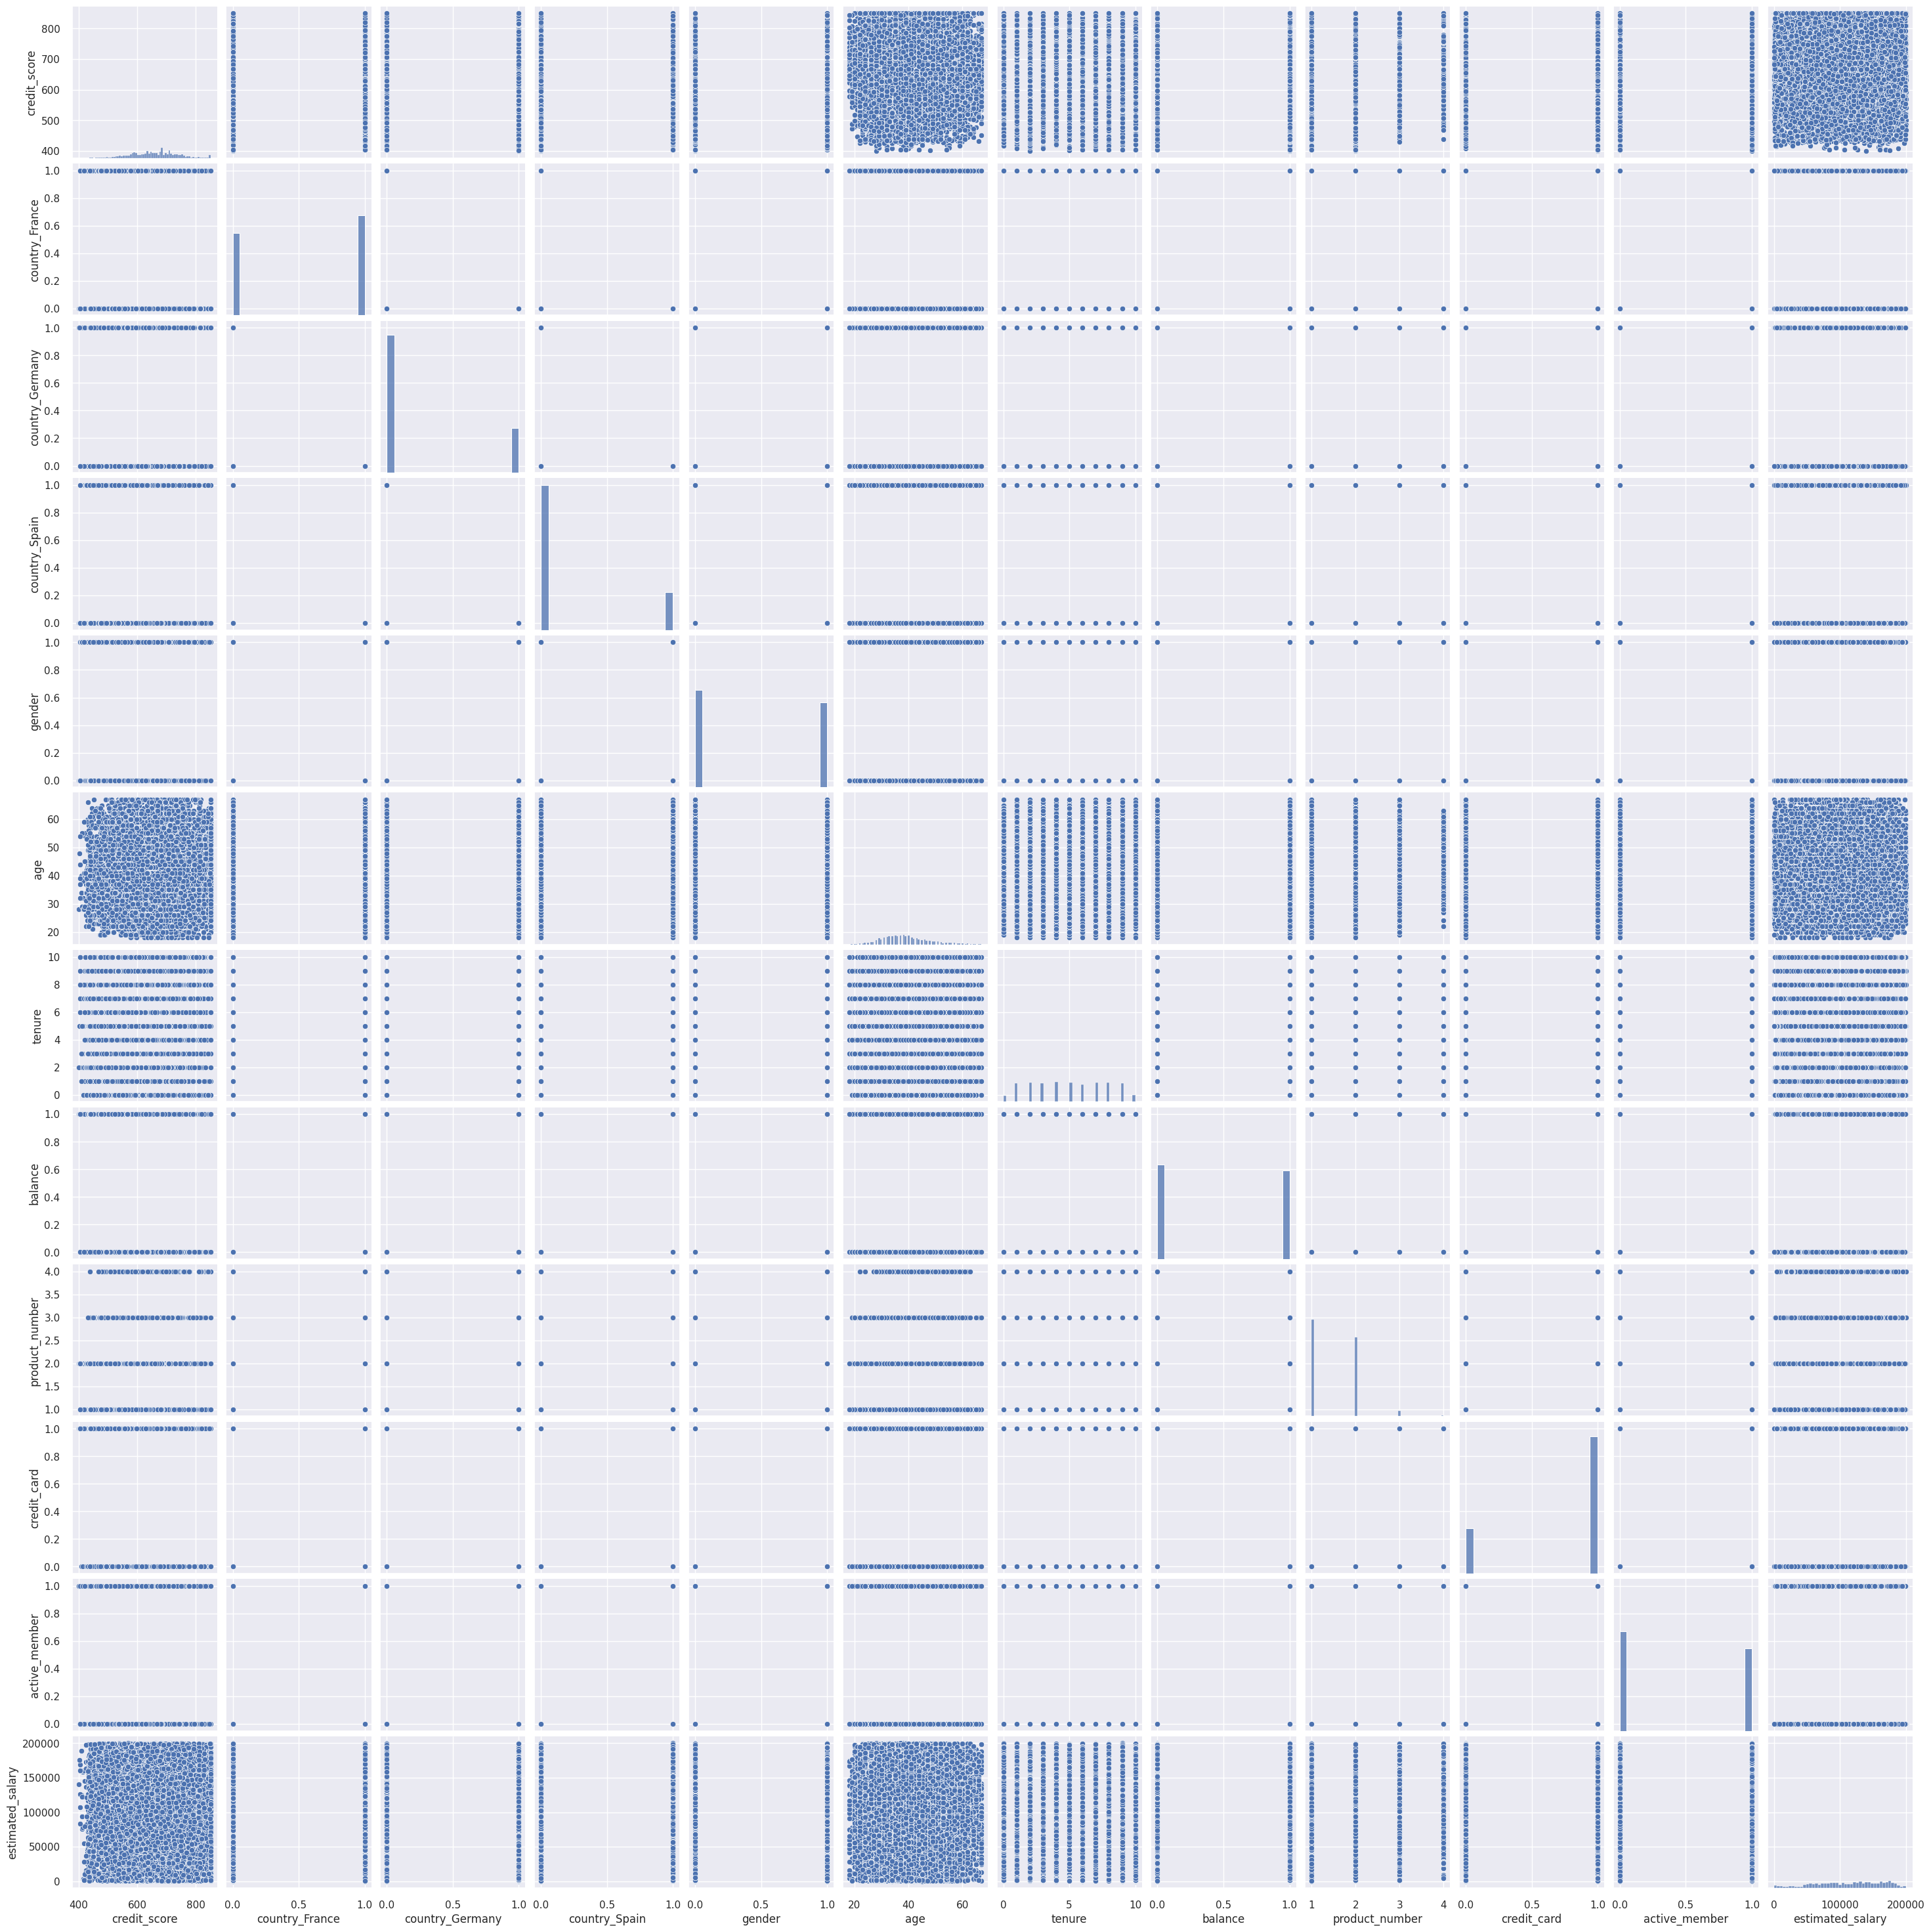

,credit_score,country_France,country_Germany,country_Spain,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary
credit_score,1.000000,-0.006764,0.000207,0.008079,-0.003960,-0.009717,-0.006400,0.007774,0.012264,-0.002924,0.013246,-0.002095
country_France,-0.006764,1.000000,-0.626238,-0.562954,-0.033681,-0.090460,0.011876,-0.378823,0.058494,0.016779,0.023841,-0.005198
country_Germany,0.000207,-0.626238,1.000000,-0.291813,0.053127,0.123641,-0.010361,0.585438,-0.096757,-0.004798,-0.048674,0.013719
country_Spain,0.008079,-0.562954,-0.291813,1.000000,-0.014999,-0.020093,-0.003587,-0.155873,0.030811,-0.015498,0.022352,-0.008166
gender,-0.003960,-0.033681,0.053127,-0.014999,1.000000,0.078984,-0.016546,0.019853,-0.034984,-0.002064,-0.050464,0.008183
age,-0.009717,-0.090460,0.123641,-0.020093,0.078984,1.000000,-0.019670,0.085202,-0.129519,-0.010916,-0.051285,0.004822
tenure,-0.006400,0.011876,-0.010361,-0.003587,-0.016546,-0.019670,1.000000,-0.014741,0.011415,-0.002554,-0.000063,0.002223
balance,0.007774,-0.378823,0.585438,-0.155873,0.019853,0.085202,-0.014741,1.000000,-0.293036,-0.024076,-0.021416,0.009187
product_number,0.012264,0.058494,-0.096757,0.030811,-0.034984,-0.129519,0.011415,-0.293036,1.000000,0.002955,0.058775,-0.000068
credit_card,-0.002924,0.016779,-0.004798,-0.015498,-0.002064,-0.010916,-0.002554,-0.024076,0.002955,1.000000,-0.030803,0.006321


In [ ]:
correlation_matrix = df_input.corr()

sns.pairplot(df_input)
plt.show()

correlation_matrix

In [ ]:
correlation_matrix_rounded = correlation_matrix.round(2)
correlation_matrix_rounded

,credit_score,country_France,country_Germany,country_Spain,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary
credit_score,1.00,-0.01,0.00,0.01,-0.00,-0.01,-0.01,0.01,0.01,-0.00,0.01,-0.00
country_France,-0.01,1.00,-0.63,-0.56,-0.03,-0.09,0.01,-0.38,0.06,0.02,0.02,-0.01
country_Germany,0.00,-0.63,1.00,-0.29,0.05,0.12,-0.01,0.59,-0.10,-0.00,-0.05,0.01
country_Spain,0.01,-0.56,-0.29,1.00,-0.01,-0.02,-0.00,-0.16,0.03,-0.02,0.02,-0.01
gender,-0.00,-0.03,0.05,-0.01,1.00,0.08,-0.02,0.02,-0.03,-0.00,-0.05,0.01
age,-0.01,-0.09,0.12,-0.02,0.08,1.00,-0.02,0.09,-0.13,-0.01,-0.05,0.00
tenure,-0.01,0.01,-0.01,-0.00,-0.02,-0.02,1.00,-0.01,0.01,-0.00,-0.00,0.00
balance,0.01,-0.38,0.59,-0.16,0.02,0.09,-0.01,1.00,-0.29,-0.02,-0.02,0.01
product_number,0.01,0.06,-0.10,0.03,-0.03,-0.13,0.01,-0.29,1.00,0.00,0.06,-0.00
credit_card,-0.00,0.02,-0.00,-0.02,-0.00,-0.01,-0.00,-0.02,0.00,1.00,-0.03,0.01


### 변수들 상관관계

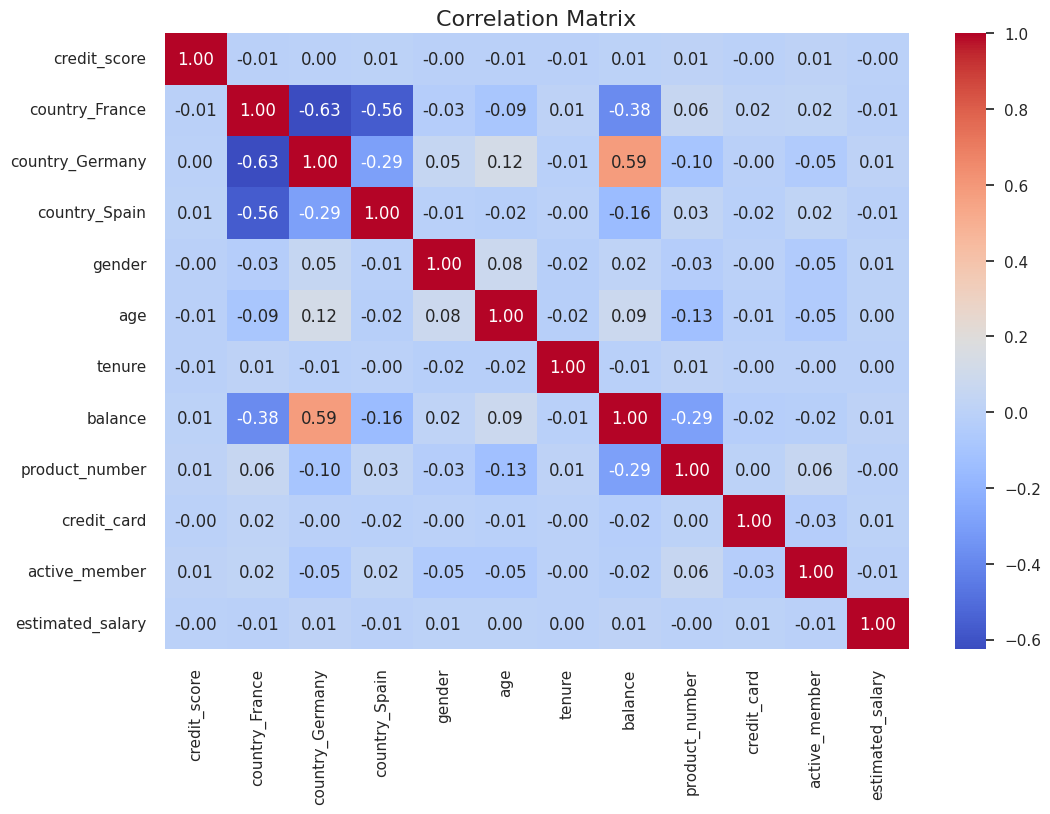

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Correlation Matrix", fontsize=16)
plt.show()

In [ ]:
df = filtered_df2 #이상치 제거, country onehot encoding
df

,customer_id,credit_score,country,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary,churn
0,15674932,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...
47006,15692761,565,Germany,Female,41.0,2,89558.39,4,1.0,1.0,4441.54,1
47007,15612187,776,Spain,Male,45.0,3,0.00,4,0.0,1.0,25951.91,1
47008,15691703,557,Spain,Female,27.0,10,0.00,1,1.0,0.0,48242.38,1
47009,15715297,795,France,Female,44.0,5,0.00,2,0.0,0.0,86414.41,1


### Performance evaluation function for classification

In [ ]:
from typing import Union
import numpy as np
from sklearn.metrics import confusion_matrix


def perf_eval_clf(y_true: Union[np.array,list], y_pred: Union[np.array,list])->list:
    """
    Input:
    y_true : ndarray of shape (n_samples,)
    y_pred : ndarray of shape (n_samples,)

    Return:
    [TPR,Precision,TNR, Accuracy, BCR, F1]: scores of classification in a list
    """
    cm = confusion_matrix(y_true = y_true, y_pred = y_pred)
    print(f"Confusion Matrix:\n{cm}")
    tn, fp, fn, tp = cm.ravel()
    TPR = round(tp/(tp+fn),3)
    PRE = round(tp/(tp+fp),3)
    TNR = round(tn/(fp+tn),3)
    ACC = round((tp+tn)/(tn+fp+fn+tp),3)
    BCR = round(np.sqrt([TPR*TNR])[0],3)
    F1 = round(2*TPR*PRE/(TPR+PRE),3)


    return [TPR,PRE,TNR,ACC,BCR,F1]

### Intialize a performance summary table

In [ ]:
import pandas as pd

def display_result(result_dict: dict, metric_names: list = ['TPR(Recall)','Precision','TNR','ACC','BCR','F1']):
    result_df = pd.DataFrame(result_dict).T
    result_df.index = list(result_dict.keys())
    result_df.columns = metric_names

    display(result_df)

result_dict= {}

### display coef

In [ ]:
def display_coefs(model,name:str)->None:
    """
    Input:
    model: Fitted model with given variables
    name: Name of the model
    """
    features = ['Constant']+model.feature_names_in_.tolist() if model.intercept_ else model.feature_names_in_.tolist()
    coefs = [model.intercept_[0]]+model.coef_[0].tolist() if model.intercept_ else model.coef_[0].tolist()
    print(f'Model: {name}')
    display(pd.DataFrame({'features':features,'coefs':coefs}))

### p-value

In [ ]:
from scipy.stats import norm
import scipy.stats as stats
def logit_pvalue(model,x,feature_names,cls=0):
    p1 = model.predict_proba(x)
    n1 = len(p1)
    m1 = len(model.coef_[cls]) + 1
    if len(model.intercept_)>1:
        #feature_names=['constant'] + feature_names
        coefs = np.concatenate([np.array(model.intercept_[cls].reshape(1,)), model.coef_[cls]])
    elif len(model.intercept_)==1:
        #feature_names=['constant'] + feature_names
        coefs = np.concatenate([model.intercept_, model.coef_[0]])
    else:
        coefs = model.coef_[cls]
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    answ = np.zeros((m1, m1))
    for i in range(n1):
        answ = answ + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p1[i,1] * p1[i, 0]
    vcov = np.linalg.inv(np.matrix(answ))
    se = np.sqrt(np.diag(vcov))
    t1 =  coefs/se
    p1 = (1 - norm.cdf(abs(t1))) * 2
    pvalue_dict = {key:round(value,4) for key,value in zip(feature_names,p1)}
    display(pd.DataFrame(pvalue_dict,columns=pvalue_dict.keys(),index=['P-value']).T)

    return pvalue_dict

In [ ]:
df = pd.read_csv('churn.csv')
df.drop(['id','Surname'], axis=1, inplace=True)
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47011 entries, 0 to 47010
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       47011 non-null  int64  
 1   credit_score      47011 non-null  int64  
 2   country           47011 non-null  object 
 3   gender            47011 non-null  object 
 4   age               47011 non-null  float64
 5   tenure            47011 non-null  int64  
 6   balance           47011 non-null  float64
 7   product_number    47011 non-null  int64  
 8   credit_card       47011 non-null  float64
 9   active_member     47011 non-null  float64
 10  estimated_salary  47011 non-null  float64
 11  churn             47011 non-null  float64
dtypes: float64(6), int64(4), object(2)
memory usage: 4.3+ MB


### 데이터 확인 및 학습/검증 데이터 분류

In [ ]:
df['country_France'] = df['country_France'].astype(int)
df['country_Germany'] = df['country_Germany'].astype(int)
df['country_Spain'] = df['country_Spain'].astype(int)
df

,customer_id,credit_score,country_France,country_Germany,country_Spain,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary,churn
0,15674932,668,1,0,0,0,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,15749177,627,1,0,0,0,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,15694510,678,1,0,0,0,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,15741417,581,1,0,0,0,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,15766172,716,0,0,1,0,33.0,5,0.00,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47006,15692761,565,0,1,0,1,41.0,2,89558.39,4,1.0,1.0,4441.54,1
47007,15612187,776,0,0,1,0,45.0,3,0.00,4,0.0,1.0,25951.91,1
47008,15691703,557,0,0,1,1,27.0,10,0.00,1,1.0,0.0,48242.38,1
47009,15715297,795,1,0,0,1,44.0,5,0.00,2,0.0,0.0,86414.41,1


In [ ]:
df["product_number"] = df["product_number"].apply(
    lambda x: np.where(x == 4, 3, x)
)
df["tenure"] = df["tenure"].apply(
    lambda x: np.where(((x >= 0) & (x <= 3)), 0, x)
)

df["tenure"] = df["tenure"].apply(
    lambda x: np.where(((x >= 4) & (x <= 7)), 1, x)
)

df["tenure"] = df["tenure"].apply(
    lambda x: np.where(((x >= 8) | (x <= 10)), 2, x)
)

df["balance"] = pd.cut(df["balance"], bins=2, labels=[0, 1])
df

,customer_id,credit_score,country_France,country_Germany,country_Spain,gender,age,tenure,balance,product_number,credit_card,active_member,estimated_salary,churn
0,15674932,668,1,0,0,0,33.0,2,0,2,1.0,0.0,181449.97,0
1,15749177,627,1,0,0,0,33.0,2,0,2,1.0,1.0,49503.50,0
2,15694510,678,1,0,0,0,40.0,2,0,2,1.0,0.0,184866.69,0
3,15741417,581,1,0,0,0,34.0,2,1,1,1.0,1.0,84560.88,0
4,15766172,716,0,0,1,0,33.0,2,0,2,1.0,1.0,15068.83,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47006,15692761,565,0,1,0,1,41.0,2,0,3,1.0,1.0,4441.54,1
47007,15612187,776,0,0,1,0,45.0,2,0,3,0.0,1.0,25951.91,1
47008,15691703,557,0,0,1,1,27.0,2,0,1,1.0,0.0,48242.38,1
47009,15715297,795,1,0,0,1,44.0,2,0,2,0.0,0.0,86414.41,1


### Logistic Regression 모델 학습

In [ ]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['churn','customer_id']) #customer id 제외
y = df['churn']

random_seed = 2018
x_trn, x_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.30, random_state=random_seed)

feature_names = X.columns
(x_trn.shape, y_trn.shape), (x_tst.shape, y_tst.shape)

(((32376, 12), (32376,)), ((13876, 12), (13876,)))

In [ ]:
from sklearn.linear_model import LogisticRegression
seed = 2018
full_config = {
    'penalty':'none',
    'fit_intercept':True,
    'max_iter':int(1e+4),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
# Saving name of the selected features
features_dict = {}
features_dict['All Variables'] = ['constant']+feature_names # all Variables

full_model_trn = LogisticRegression(**full_config).fit(x_trn,y_trn)
full_model_tst = LogisticRegression(**full_config).fit(x_tst,y_tst)
#logit_pvalue(full_model,x_trn,feature_names)

y_trn_pred = full_model_trn.predict(x_trn)
y_tst_pred = full_model_tst.predict(x_tst)
result_dict['churn_trn'] = perf_eval_clf(y_trn,y_trn_pred)
result_dict['churn_tst'] = perf_eval_clf(y_tst,y_tst_pred)


display_coefs(full_model_trn,'All_variables')
display_result(result_dict)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Confusion Matrix:
[[19956   257]
 [11500   663]]
Confusion Matrix:
[[8607    1]
 [5262    6]]
Model: All_variables


,features,coefs
0,Constant,-2.173138e-05
1,credit_score,-2.037904e-03
2,country_France,-5.442041e-04
3,country_Germany,6.950148e-04
4,country_Spain,-1.725420e-04
5,gender,5.382437e-04
6,age,2.124591e-02
7,tenure,-4.346276e-05
8,balance,1.934657e-04
9,product_number,-9.646530e-04


,TPR(Recall),Precision,TNR,ACC,BCR,F1
All Variables,0.056,0.755,0.989,0.638,0.235,0.104
churn_trn,0.055,0.721,0.987,0.637,0.233,0.102
churn_tst,0.001,0.857,1.000,0.621,0.032,0.002


In [ ]:
logit_pvalue(full_model_trn,x_trn,feature_names)

,P-value
credit_score,1.0000
country_France,0.0000
country_Germany,0.9848
country_Spain,0.9960
gender,0.9814
age,0.0000
tenure,1.0000
balance,0.9628
product_number,0.9967
credit_card,0.9719


{'credit_score': 1.0,
 'country_France': 0.0,
 'country_Germany': 0.9848,
 'country_Spain': 0.996,
 'gender': 0.9814,
 'age': 0.0,
 'tenure': 1.0,
 'balance': 0.9628,
 'product_number': 0.9967,
 'credit_card': 0.9719,
 'active_member': 0.6352}

In [ ]:
def compute_auroc(y_true, y_score):
    y_true = y_true.values
    y_score = y_score[:, 1]

    desc_score_indices = np.argsort(y_score)[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]

    n_pos = np.sum(y_true)
    n_neg = len(y_true) - n_pos

    tpr = np.zeros(len(y_true))
    fpr = np.zeros(len(y_true))

    for i in range(len(y_true)):
        if y_true[i] == 1:
            tpr[i:] += 1
        else:
            fpr[i:] += 1

    tpr /= n_pos
    fpr /= n_neg

    auroc = np.trapz(tpr, fpr)
    return auroc

y_prob_trn = full_model_trn.predict_proba(x_trn)
y_prob_tst = full_model_tst.predict_proba(x_tst)
auroc_train = compute_auroc(y_trn, y_prob_trn)
auroc_test = compute_auroc(y_tst, y_prob_tst)

print(f"Training data AUROC: {auroc_train}")
print(f"Test data AUROC: {auroc_test}")


Training data AUROC: 0.7065228839131441
Test data AUROC: 0.667355731843804


### 변수간 강한 상관관계를 가진 변수들을 제외하여 다시 Logistic Regression

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46252 entries, 0 to 47010
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   customer_id       46252 non-null  int64   
 1   credit_score      46252 non-null  int64   
 2   country_France    46252 non-null  int64   
 3   country_Germany   46252 non-null  int64   
 4   country_Spain     46252 non-null  int64   
 5   gender            46252 non-null  int64   
 6   age               46252 non-null  float64 
 7   tenure            46252 non-null  int64   
 8   balance           46252 non-null  category
 9   product_number    46252 non-null  int64   
 10  credit_card       46252 non-null  float64 
 11  active_member     46252 non-null  float64 
 12  estimated_salary  46252 non-null  float64 
 13  churn             46252 non-null  int64   
dtypes: category(1), float64(4), int64(9)
memory usage: 5.0 MB


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['churn','customer_id', 'balance', 'country_Germany'])
y = df['churn']

random_seed = 2019
x_trn, x_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.30, random_state=random_seed)

features_name = X.columns
(x_trn.shape, y_trn.shape), (x_tst.shape, y_tst.shape)

(((32376, 10), (32376,)), ((13876, 10), (13876,)))

In [ ]:
from sklearn.linear_model import LogisticRegression
seed = 2019
full_config = {
    'penalty':'none',
    'fit_intercept':True,
    'max_iter':int(1e+4),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}

features_dict = {}
features_dict['All Variables'] = ['constant']+feature_names # all Variables

full_model_trn = LogisticRegression(**full_config).fit(x_trn,y_trn)
full_model_tst = LogisticRegression(**full_config).fit(x_tst,y_tst)
#logit_pvalue(full_model,x_trn,feature_names)

y_trn_pred = full_model_trn.predict(x_trn)
y_tst_pred = full_model_tst.predict(x_tst)
result_dict = {}
result_dict['churn_trn'] = perf_eval_clf(y_trn,y_trn_pred)
result_dict['churn_tst'] = perf_eval_clf(y_tst,y_tst_pred)


display_coefs(full_model_trn,'All_variables')
display_result(result_dict)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Confusion Matrix:
[[19909   262]
 [11566   639]]
Confusion Matrix:
[[8647    3]
 [5219    7]]
Model: All_variables


,features,coefs
0,Constant,-2.571841e-05
1,credit_score,-2.014730e-03
2,country_France,-5.391540e-04
3,country_Spain,-1.753262e-04
4,gender,5.416559e-04
5,age,2.096841e-02
6,tenure,-5.143683e-05
7,product_number,-9.652852e-04
8,credit_card,-1.097181e-04
9,active_member,-8.227332e-04


,TPR(Recall),Precision,TNR,ACC,BCR,F1
churn_trn,0.052,0.709,0.987,0.635,0.227,0.097
churn_tst,0.001,0.700,1.000,0.624,0.032,0.002


In [ ]:
logit_pvalue(full_model_trn,x_trn,feature_names)

,P-value
credit_score,1.0000
country_France,0.0000
country_Germany,0.9848
country_Spain,0.9960
gender,0.9814
age,0.0000
tenure,1.0000
balance,0.9628
product_number,0.9967
credit_card,0.9719


{'credit_score': 1.0,
 'country_France': 0.0,
 'country_Germany': 0.9848,
 'country_Spain': 0.996,
 'gender': 0.9814,
 'age': 0.0,
 'tenure': 1.0,
 'balance': 0.9628,
 'product_number': 0.9967,
 'credit_card': 0.9719,
 'active_member': 0.6352}

In [ ]:
def compute_auroc(y_true, y_score):
    y_true = y_true.values
    y_score = y_score[:, 1]


    desc_score_indices = np.argsort(y_score)[::-1]
    y_score = y_score[desc_score_indices]
    y_true = y_true[desc_score_indices]


    n_pos = np.sum(y_true)
    n_neg = len(y_true) - n_pos


    tpr = np.zeros(len(y_true))
    fpr = np.zeros(len(y_true))


    for i in range(len(y_true)):
        if y_true[i] == 1:
            tpr[i:] += 1
        else:
            fpr[i:] += 1

    tpr /= n_pos
    fpr /= n_neg


    auroc = np.trapz(tpr, fpr)
    return auroc

y_prob_trn = full_model_trn.predict_proba(x_trn)
y_prob_tst = full_model_tst.predict_proba(x_tst)
auroc_train = compute_auroc(y_trn, y_prob_trn)
auroc_test = compute_auroc(y_tst, y_prob_tst)

print(f"Training data AUROC: {auroc_train}")
print(f"Test data AUROC: {auroc_test}")


Training data AUROC: 0.7029965324537475
Test data AUROC: 0.6752459799711978


### Q8

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['churn','customer_id']) #customer id 제외
y = df['churn']


random_seed = 2018  # setting a random seed for reproducibility
x_trn, x_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.30, random_state=random_seed)


feature_names = X.columns
(x_trn.shape, y_trn.shape), (x_tst.shape, y_tst.shape)

(((32376, 12), (32376,)), ((13876, 12), (13876,)))

### Forward Selection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector as SFS

# SequentialFeatureSelector 학습
full_config = {
    'penalty':'none',
    'fit_intercept':True,
    'max_iter':int(10),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
full_model = LogisticRegression(**full_config)

forward_config = {
    'estimator':full_model,
    'n_features_to_select':'auto',
    'tol':1e-4,
    'direction':'forward',
    'scoring':'f1',
    'cv':5,
    'n_jobs':-1
}

forward_selection = SFS(**forward_config).fit(x_trn,y_trn)
features_dict['Forward Selection']=forward_features = forward_selection.get_feature_names_out()

print(forward_features)

['country_Germany' 'gender' 'age' 'tenure' 'product_number' 'credit_card'
 'active_member']


In [ ]:
import time
import pandas as pd
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression


start_time = time.time()
forward_config = {
    'estimator':full_model,
    'n_features_to_select':'auto',
    'tol':1e-4,
    'direction':'forward',
    'scoring':'f1',
    'cv':5,
    'n_jobs':-1
}
forward_selection = SFS(**forward_config).fit(x_trn, y_trn)
selection_time = time.time() - start_time
selected_features = forward_selection.get_feature_names_out()
print("Selected features:", selected_features)


start_time = time.time()
model = LogisticRegression(**full_config)
model.fit(x_trn[selected_features], y_trn)
training_time = time.time() - start_time

y_prob = model.predict_proba(x_trn[selected_features])


auroc = roc_auc_score(y_trn, y_prob[:, 1])


results = pd.DataFrame({
    "Step": ["Feature Selection", "Model Training"],
    "Time (seconds)": [selection_time, training_time],
    "AUROC": ['--', auroc]
})

y_tst_pred = model.predict(x_tst[selected_features])
result_dict = {}
result_dict['forward_tst'] = perf_eval_clf(y_tst, y_tst_pred)

Selected features: ['country_Germany' 'gender' 'age' 'balance' 'product_number'
 'active_member']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Confusion Matrix:
[[7471 1137]
 [1984 3284]]


In [ ]:
results

,Step,Time (seconds),AUROC
0,Feature Selection,110.687486,--
1,Model Training,0.549446,0.830578


In [ ]:
display_result(result_dict)

,TPR(Recall),Precision,TNR,ACC,BCR,F1
forward_tst,0.623,0.743,0.868,0.775,0.735,0.678


### Backward Elimination

In [ ]:
# SequentialFeatureSelector 학습
full_config = {
    'penalty':'none',
    'fit_intercept':True,
    'max_iter':int(10),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
full_model = LogisticRegression(**full_config)

backward_config = {
    'estimator':full_model,
    'n_features_to_select':'auto',
    'tol':1e-3,
    'direction':'backward',
    'scoring':'f1',
    'cv':5,
    'n_jobs':-1
}

backward_eliminaion = SFS(**backward_config).fit(x_trn,y_trn)
features_dict['Backward Elimination'] = backward_features = backward_eliminaion.get_feature_names_out()
print(backward_features)

['country_France' 'country_Germany' 'country_Spain' 'gender' 'age'
 'tenure' 'balance' 'product_number' 'credit_card' 'active_member']


In [ ]:
# SequentialFeatureSelector로 피처 선택
start_time = time.time()
backward_elimination = SFS(**backward_config).fit(x_trn, y_trn)
selection_time = time.time() - start_time
backward_selected_features = backward_elimination.get_feature_names_out()
print("Selected features (backward elimination):", backward_selected_features)


start_time = time.time()
model_with_backward_features = LogisticRegression(**full_config)
model_with_backward_features.fit(x_trn[backward_selected_features], y_trn)
training_time = time.time() - start_time


y_prob_backward = model_with_backward_features.predict_proba(x_trn[backward_selected_features])

# AUROC 계산
auroc_backward = roc_auc_score(y_trn, y_prob_backward[:, 1])


backward_results = pd.DataFrame({
    "Step": ["Feature Selection", "Model Training"],
    "Time (seconds)": [selection_time, training_time],
    "AUROC": ['--', auroc_backward]  # AUROC는 모델 학습 후만 계산
})


backward_results

y_tst_pred = model_with_backward_features.predict(x_tst[backward_selected_features])
result_dict['backward_tst'] = perf_eval_clf(y_tst, y_tst_pred)
display_result(result_dict)

Selected features (backward elimination): ['country_France' 'country_Germany' 'country_Spain' 'gender' 'age'
 'tenure' 'balance' 'product_number' 'credit_card' 'active_member']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Confusion Matrix:
[[7464 1144]
 [1980 3288]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
forward_tst,0.623,0.743,0.868,0.775,0.735,0.678
backward_tst,0.624,0.742,0.867,0.775,0.736,0.678


### Stepwise Selection

In [ ]:
# SequentialFeatureSelector 학습
full_config = {
    'penalty':'none',
    'fit_intercept':True,
    'max_iter':int(100),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1

}
full_model = LogisticRegression(**full_config)

stepwise_config = {
    'estimator':full_model,
    'n_features_to_select':'auto',
    'tol':None,
    'direction':'forward',
    'scoring':'f1',
    'cv':5,
    'n_jobs':-1
}

stepwise_selection = SFS(**stepwise_config).fit(x_trn,y_trn)
features_dict['Stepwise Selection']= stepwise_features = stepwise_selection.get_feature_names_out()

print(stepwise_features)

['country_Germany' 'gender' 'age' 'balance' 'product_number'
 'active_member']


In [ ]:
# 로지스틱 회귀 모델 및 피처 선택 설정은 위와 같이 정의됩니다.


start_time = time.time()
stepwise_selection = SFS(**stepwise_config).fit(x_trn, y_trn)
selection_time = time.time() - start_time
stepwise_features = stepwise_selection.get_feature_names_out()


start_time = time.time()
model_with_stepwise_features = LogisticRegression(**full_config)
model_with_stepwise_features.fit(x_trn[stepwise_features], y_trn)
training_time = time.time() - start_time


y_prob_stepwise = model_with_stepwise_features.predict_proba(x_trn[stepwise_features])


auroc_stepwise = roc_auc_score(y_trn, y_prob_stepwise[:, 1])


stepwise_results = pd.DataFrame({
    "Method": ["Stepwise Feature Selection"],
    "Feature Selection Time (seconds)": [selection_time],
    "Model Training Time (seconds)": [training_time],
    "AUROC": [auroc_stepwise]
})

stepwise_results
y_tst_pred = model_with_stepwise_features.predict(x_tst[stepwise_features])
result_dict['stepwise_tst'] = perf_eval_clf(y_tst, y_tst_pred)
display_result(result_dict)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


Confusion Matrix:
[[7471 1137]
 [1984 3284]]


,TPR(Recall),Precision,TNR,ACC,BCR,F1
forward_tst,0.623,0.743,0.868,0.775,0.735,0.678
backward_tst,0.624,0.742,0.867,0.775,0.736,0.678
stepwise_tst,0.623,0.743,0.868,0.775,0.735,0.678


In [ ]:
logit_pvalue(model_with_stepwise_features,x_trn[stepwise_features], stepwise_features)

,P-value
country_Germany,0.0
gender,0.0
age,0.0
balance,0.0
product_number,0.0
active_member,0.0


{'country_Germany': 0.0,
 'gender': 0.0,
 'age': 0.0,
 'balance': 0.0,
 'product_number': 0.0,
 'active_member': 0.0}

In [ ]:
stepwise_results = pd.DataFrame({
    "Step": ["Feature Selection", "Model Training"],
    "Time (seconds)": [selection_time, training_time],
    "AUROC": ['--', auroc_backward]
})
stepwise_results

,Step,Time (seconds),AUROC
0,Feature Selection,109.879708,--
1,Model Training,0.551360,0.831166


### GA 기반 변수선택함수

In [ ]:
df = pd.read_csv('churn3.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46252 entries, 0 to 46251
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       46252 non-null  int64  
 1   credit_score      46252 non-null  int64  
 2   country_France    46252 non-null  int64  
 3   country_Germany   46252 non-null  int64  
 4   country_Spain     46252 non-null  int64  
 5   gender            46252 non-null  int64  
 6   age               46252 non-null  float64
 7   tenure            46252 non-null  int64  
 8   balance           46252 non-null  int64  
 9   product_number    46252 non-null  int64  
 10  credit_card       46252 non-null  float64
 11  active_member     46252 non-null  float64
 12  estimated_salary  46252 non-null  float64
 13  churn             46252 non-null  int64  
dtypes: float64(4), int64(10)
memory usage: 4.9 MB


In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['churn','customer_id']) #customer id 제외
y = df['churn']


random_seed = 2018
x_trn, x_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.30, random_state=random_seed)


feature_names = X.columns
(x_trn.shape, y_trn.shape), (x_tst.shape, y_tst.shape)

(((32376, 12), (32376,)), ((13876, 12), (13876,)))

In [ ]:
from typing import Union
from sklearn.metrics import roc_auc_score

class GeneticAlgorithm(object):
    def __init__(self,
    population_size: int,
    n_feat: int,
    n_parents: int,
    n_gen: int,
    init_rate: float,
    mutation_rate:float,
    crossover_rate:float,
    model:object,
    seed: int

    ) -> None:
        """
        population_size: (int) size of population
        n_feat: (int) number of total features
        n_parents: (int) number of parents chromosomes
        n_gen: (int) number of generations
        init_rate: (float) fraction of non-selected features
        mutation_rate: (float) probability of generating mutation
        crossover_rate: (float) probability of doing cross over on each variable
        model: classification models of sckit-learn
        seed: (int) set the randomness

        """
        self.population_size = population_size
        self.n_feat = n_feat
        self.n_parents = n_parents
        self.n_gen = n_gen
        self.init_rate = init_rate
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.model = model
        self.seed = seed

    def initialization_of_population(self,size: int, n_feat: int, init_prob: float)->list:

        population = []
        for i in range(size):
            chromosome = np.bool_(np.ones(n_feat))
            chromosome[:int(init_prob*n_feat)]=False
            np.random.shuffle(chromosome) # 선택되는 feature의 비율을 정한 후 무작위로 선택
            population.append(chromosome)

        return population


    def fitness_score(self, model, population:list, X_train:Union[np.array,pd.DataFrame], Y_train:Union[np.array,pd.DataFrame]):
        scores = []
        for chromosome in population:
            model.fit(X_train.iloc[:, chromosome], Y_train)
            probabilities = model.predict_proba(X_train.iloc[:, chromosome])[:, 1]
            scores.append(roc_auc_score(Y_train, probabilities))
        scores, population = np.array(scores), np.array(population)
        inds = np.argsort(scores)
        return list(scores[inds][::-1]), list(population[inds,:][::-1])

    def selection(self,pop_after_fit,n_parents):
        population_nextgen = []
        for i in range(n_parents):
            population_nextgen.append(pop_after_fit[i])
        return population_nextgen


    def crossover(self,pop_after_sel:list,crossover_rate:float):
        pop_nextgen = pop_after_sel
        for i in range(0,len(pop_after_sel),2):
            new_par = []
            child_1 , child_2 = pop_nextgen[i] , pop_nextgen[i+1]
            new_par = []
            select_idx = np.random.random_sample(len(child_1)) > crossover_rate
            for j in range(len(child_1)):
                new_par.append(child_1[j] if select_idx[j] else child_2[j])
            pop_nextgen.append(new_par)
        return pop_nextgen

    def mutation(self, pop_after_cross:list, mutation_rate:float, n_feat:int):
        mutation_range = int(mutation_rate*n_feat)
        pop_next_gen = []
        for n in range(0,len(pop_after_cross)):
            chromo = pop_after_cross[n]
            rand_posi = []
            for i in range(0,mutation_range):
                pos = np.random.randint(0,n_feat-1)
                rand_posi.append(pos)
            for j in rand_posi:
                chromo[j] = not chromo[j]
            pop_next_gen.append(chromo)
        return pop_next_gen

    def fit(self,
            x_trn:Union[np.array, pd.DataFrame],
            y_trn:Union[np.array, pd.Series,list,],
            x_tst:Union[np.array, pd.DataFrame],
            y_tst:Union[np.array, pd.Series,list]):

        np.random.seed(self.seed)
        best_chromo= []
        best_score= []
        population_nextgen = self.initialization_of_population(self.population_size, self.n_feat, self.init_rate)
        for i in range(self.n_gen):
            scores, pop_after_fit = self.fitness_score(
                self.model,
                population_nextgen,
                x_trn, y_trn
                )
            #print('Best score(Training) in generation',i+1,':',scores[:1])  #2
            pop_after_sel = self.selection(pop_after_fit,self.n_parents)
            pop_after_cross = self.crossover(pop_after_sel,self.crossover_rate)
            population_nextgen = self.mutation(pop_after_cross, self.mutation_rate, self.n_feat)
            best_chromo.append(pop_after_fit[0])
            best_score.append(scores[0])
        return best_chromo, best_score

In [ ]:
from sklearn.linear_model import LogisticRegression
seed = 2020
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':int(10000),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1,


}
full_model = LogisticRegression(**full_config)

genetic_config={
    'population_size':20,
    'n_feat':12,
    'n_parents':2,
    'n_gen':5,
    'init_rate':0.3,
    'mutation_rate':0.1,
    'crossover_rate':0.3,
    'model':full_model,
    'seed':seed
}

GA = GeneticAlgorithm(**genetic_config)
bestchromo,bestscores = GA.fit(x_trn,y_trn,x_tst,y_tst)
features_dict = {}
features_dict['Genetic Algorithm'] = genetic_features = np.array(feature_names)[bestchromo[np.argmax(bestscores)]].tolist()
print(genetic_features)

Best score(Training) in generation 1 : [0.8288950194203011]
Best score(Training) in generation 2 : [0.8288097705339638]
Best score(Training) in generation 3 : [0.8288946004668792]
Best score(Training) in generation 4 : [0.8289000265238191]
Best score(Training) in generation 5 : [0.8288950194203011]
['country_Germany', 'gender', 'age', 'tenure', 'balance', 'product_number', 'credit_card', 'active_member']


In [ ]:
x_trn_genetic = x_trn[genetic_features]
x_tst_genetic = x_tst[genetic_features]
genetic_logit = LogisticRegression(**full_config).fit(x_trn_genetic,y_trn)

y_pred = genetic_logit.predict(x_tst_genetic)
result_dict['Genetic Algorithm'] = perf_eval_clf(y_tst,y_pred)
display_coefs(genetic_logit,'Genetic Algorithm')
display_result(result_dict)

Confusion Matrix:
[[7458 1150]
 [1993 3275]]
Model: Genetic Algorithm


,features,coefs
0,Constant,-3.868304
1,country_Germany,1.168344
2,gender,0.649230
3,age,0.117485
4,tenure,-0.010077
5,balance,-0.159093
6,product_number,-0.763345
7,credit_card,-0.218560
8,active_member,-1.196636


,TPR(Recall),Precision,TNR,ACC,BCR,F1
Genetic Algorithm,0.622,0.74,0.866,0.773,0.734,0.676


### 변수 감소율

In [ ]:
import pandas as pd


forward_selection = ['country_Germany', 'gender', 'age', 'tenure', 'product_number', 'credit_card']
backward_elimination = ['country_France', 'country_Germany', 'country_Spain', 'gender', 'age']
stepwise_selection = ['country_Germany', 'gender', 'age', 'balance', 'product_number', 'active_member']
ga_selection = ['country_Germany', 'gender', 'age', 'tenure', 'balance', 'product_number', 'credit_card', 'active_member']


all_features = [
    'customer_id', 'credit_score', 'country_France', 'country_Germany', 'country_Spain',
    'gender', 'age', 'tenure', 'balance', 'product_number', 'credit_card', 'active_member',
    'estimated_salary', 'churn'
]


used_features = list(set(forward_selection + backward_elimination + stepwise_selection + ga_selection))

# Create a dataframe to indicate whether each feature was used by each model ('o' for used, 'x' for not used)
model_feature_matrix = pd.DataFrame(
    columns=['Feature', 'FS', 'BE', 'SS', 'GA'],
    data=[[feature,
           'o' if feature in forward_selection else 'x',
           'o' if feature in backward_elimination else 'x',
           'o' if feature in stepwise_selection else 'x',
           'o' if feature in ga_selection else 'x'] for feature in used_features]
)

model_feature_matrix


,Feature,FS,BE,SS,GA
0,gender,o,o,o,o
1,credit_card,o,x,x,o
2,product_number,o,x,o,o
3,country_France,x,o,x,x
4,tenure,o,x,x,o
5,active_member,x,x,o,o
6,country_Germany,o,o,o,o
7,age,o,o,o,o
8,country_Spain,x,o,x,x
9,balance,x,x,o,o


In [ ]:
# Count how many times each feature was used
model_feature_matrix['Usage_Count'] = (model_feature_matrix.iloc[:, 1:] == 'o').sum(axis=1)

sorted_model_feature_matrix = model_feature_matrix.sort_values(by='Usage_Count', ascending=False).reset_index(drop=True)

sorted_model_feature_matrix[['Feature', 'Usage_Count']]


,Feature,Usage_Count
0,gender,4
1,country_Germany,4
2,age,4
3,product_number,3
4,credit_card,2
5,tenure,2
6,active_member,2
7,balance,2
8,country_France,1
9,country_Spain,1


### 수행시간 비교

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['churn']) #customer id 제외
y = df['churn']


random_seed = 2022  # setting a random seed for reproducibility
x_trn, x_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.30, random_state=random_seed)


feature_names = X.columns
(x_trn.shape, y_trn.shape), (x_tst.shape, y_tst.shape)

(((32376, 13), (32376,)), ((13876, 13), (13876,)))

In [ ]:
x_trn.columns

Index(['customer_id', 'credit_score', 'country_France', 'country_Germany',
       'country_Spain', 'gender', 'age', 'tenure', 'balance', 'product_number',
       'credit_card', 'active_member', 'estimated_salary'],
      dtype='object')

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
import time

model_configs = {
    "Forward Selection": ['country_Germany', 'gender', 'age', 'tenure', 'product_number', 'credit_card'],
    "Backward Elimination": ['country_France', 'country_Germany', 'country_Spain', 'gender', 'age'],
    "Stepwise Selection": ['country_Germany', 'gender', 'age', 'balance', 'product_number', 'active_member'],
    "GA": ['country_Germany', 'gender', 'age', 'tenure', 'balance', 'product_number', 'credit_card', 'active_member']
}


logistic_config = {
    'penalty':'none',
    'fit_intercept':True,
    'max_iter':int(1e+4),
    'solver':'saga',
    'random_state':2021,
    'n_jobs':-1
}

# Timing and training each model
training_times = {}
for name, features in model_configs.items():
    start_time = time.time()
    model = LogisticRegression(**logistic_config)
    model.fit(x_trn[features], y_trn)
    training_times[name] = time.time() - start_time


training_times_df = pd.DataFrame(list(training_times.items()), columns=['Model', 'Training Time'])
training_times_df

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(


,Model,Training Time
0,Forward Selection,1.009368
1,Backward Elimination,0.565001
2,Stepwise Selection,1.069535
3,GA,1.945676


### GA 하이퍼파라미터

In [ ]:
from sklearn.model_selection import train_test_split


X = df.drop(columns=['churn','customer_id']) #customer id 제외
y = df['churn']


random_seed = 2020  # setting a random seed for reproducibility
x_trn, x_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.30, random_state=random_seed)

# Checking the dimensions of the splits
feature_names = X.columns
(x_trn.shape, y_trn.shape), (x_tst.shape, y_tst.shape)

(((32376, 12), (32376,)), ((13876, 12), (13876,)))

In [ ]:
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score

seed = 2020
full_config = {
    'penalty':None,
    'fit_intercept':True,
    'max_iter':int(10000),
    'solver':'saga',
    'random_state':seed,
    'n_jobs':-1,

}

full_model = LogisticRegression(**full_config)

# 하이퍼파라미터 범위 설정
population_sizes = [10, 30, 50]
crossover_rates = [0.2, 0.5, 0.8]
mutation_rates = [0.05, 0.1, 0.2]

results = []

for population_size in population_sizes:
    for crossover_rate in crossover_rates:
        for mutation_rate in mutation_rates:
            genetic_config = {
                'population_size': population_size,
                'n_feat': x_trn.shape[1],
                'n_parents': 2,
                'n_gen': 5,
                'init_rate': 0.3,
                'mutation_rate': mutation_rate,
                'crossover_rate': crossover_rate,
                'model': model,
                'seed': seed
            }
            GA = GeneticAlgorithm(**genetic_config)
            best_chromo, best_scores = GA.fit(x_trn, y_trn, x_tst, y_tst)
            genetic_features = np.array(feature_names)[bestchromo[np.argmax(bestscores)]].tolist()
            x_trn_genetic = x_trn[genetic_features]
            x_tst_genetic = x_tst[genetic_features]
            genetic_logit = LogisticRegression(**full_config).fit(x_trn_genetic,y_trn)
            y_pred = genetic_logit.predict(x_tst_genetic)
            f1 = f1_score(y_tst, y_pred)
            #roc_auc_score = roc_auc_score(y_tst, y_pred)
            results.append({
                'Population Size': population_size,
                'Mutation Rate': mutation_rate,
                'Crossover Rate': crossover_rate,
                'F1 Score': f1
                #'roc_auc_score':roc_auc_score
            })


df_results = pd.DataFrame(results)
df_results_sorted = df_results.sort_values('F1 Score', ascending=False)

# Display the results
df_results_sorted

,Population Size,Mutation Rate,Crossover Rate,F1 Score
0,10,0.05,0.2,0.679703
14,30,0.20,0.5,0.679703
25,50,0.10,0.8,0.679703
24,50,0.05,0.8,0.679703
23,50,0.20,0.5,0.679703
22,50,0.10,0.5,0.679703
21,50,0.05,0.5,0.679703
20,50,0.20,0.2,0.679703
19,50,0.10,0.2,0.679703
18,50,0.05,0.2,0.679703
